In [1]:
%timeit
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import os

In [2]:
%timeit
Case  = "16 Typhoon cases"
fTime = "20100919060000"
period= "All"

files=np.zeros(4)

path1='/home/miayao/average/maple_144/alldata/'+period
path2='/home/miayao/average/maple_144/typhoon/'+period
path3='/home/miayao/average/maple_144/QPESUMS/'+period

files1=os.listdir(path1)
files2=os.listdir(path2)
files3=os.listdir(path3)


ets_maple48=[]
ets_maple144=[]
ets_com=[]
ets_wrf=[]
a=0
b=0
c=0
d=0

for file in files1:
    if not os.path.isdir(file):
        f=nc.Dataset(path1+'/'+file)
        ets_maple48.append((f.variables['RMSE'][:]))
        a +=1

for file in files2:
    if not os.path.isdir(file):
        f=nc.Dataset(path2+'/'+file)
        ets_maple144.append((f.variables['RMSE'][:]))
        b +=1
        
for file in files3:
    if not os.path.isdir(file):
        f=nc.Dataset(path3+'/'+file)
        ets_com.append((f.variables['RMSE'][:]))
        c +=1
        

In [3]:
ets_maple48=np.array(ets_maple48[:])
ets_maple48=np.where(ets_maple48==-999,np.nan,ets_maple48)
avg_ets_maple48=np.nanmean(ets_maple48,axis=0)

ets_maple144=np.array(ets_maple144[:])
ets_maple144=np.where(ets_maple144==-999,np.nan,ets_maple144)
avg_ets_maple144=np.nanmean(ets_maple144,axis=0)

ets_com=np.array(ets_com[:])
ets_com=np.where(ets_com==-999,np.nan,ets_com)
avg_ets_com=np.nanmean(ets_com,axis=0)


(6,)


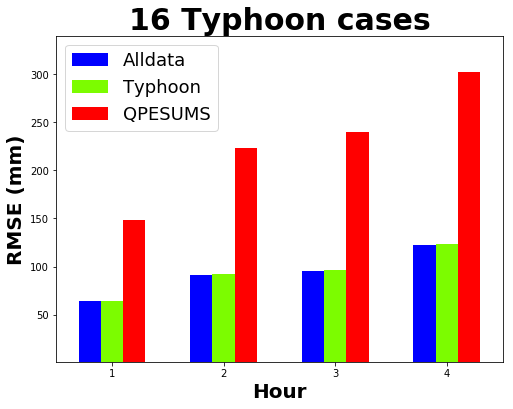

In [42]:
#####Start plot ###############
print(avg_ets_com.shape)
barWidth = 0.2

x =np.linspace(0.,5,6)

plt.figure(figsize=(8,6))
plt.bar(x-0.2,avg_ets_maple48,barWidth,label='Alldata',color='blue',bottom=1.0)
plt.bar(x-0.0,avg_ets_maple144,barWidth,label='Typhoon',color='lawngreen',bottom=1.0)
plt.bar(x+0.2,avg_ets_com,barWidth,label='QPESUMS',color='red',bottom=1.0)
plt.xticks(x,[1,2,3,4,5,6])
plt.xlim(-0.5,3.5)
plt.title("16 Typhoon cases",size=30,weight='heavy')
plt.ylabel("RMSE (mm)",size=20,weight='heavy')
plt.xlabel("Hour", size=20, weight='heavy')
plt.legend(loc=2, prop={'size': 18})
plt.savefig('/home/miayao/average/'+Case+'_rmse_'+period+'_all.png',dpi=300)